In [3]:
%pylab inline
%matplotlib inline
import pickle
Data=pickle.load(open('../../Data/Weather/SampleStations.pickle','r'))
STAT,STAT_description=pickle.load(open('../../Data/Weather/STAT.pickle','r'))

FlatData=[]
for station in Data:
    stationname=station[0]
    for measurements in station[1]:
        measurement,year=measurements[0]
        yeardata=list(measurements[1])
        rowData=[stationname]+[measurement]+[year]+yeardata
        FlatData.append(rowData)
        
import pandas as pd

frameheader=['station','measurement','year']+range(1,366)
df=pd.DataFrame(FlatData,columns=frameheader)

m_df={}
for m in ['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']:
    t_df=df[df['measurement']==m]
    m_df[m]=t_df    
    


Populating the interactive namespace from numpy and matplotlib


# Checking for values around end and beginning of months

By specifically attempting to remove the noisy values around beginning and end of the months, we can see the sudden changes in the graphs decrease. Few stations have higher month transition NaN counts as visible in the table.

By removing either of the records: 1) only with noisy data for the station or 2) completely removing the stations, 
the graph can be made more smooth.

As visible in the graphs, the NaN values are higher along the year end values and it means there was some issue with snow depth recording especially near the year transitions. And month transitions might correspond to the servicing of the sensors.

In [12]:
s_m_df = m_df['SNWD']

tmp_df = s_m_df
for i in [1,31,32,59,60,90,91,120,121,151,152,181,182,212,213,243,244,273,274,304,305,334,335,365]:
    tmp_df = tmp_df[tmp_df[i].isnull()]

tmp1 = tmp_df.groupby('station').count().sort_values(['measurement'],ascending=[0])
print tmp1

tmp1_df = s_m_df
k = 0
for i in [1,31,32,59,60,90,91,120,121,151,152,181,182,212,213,243,244,273,274,304,305,334,335,365]:
    if(k%2==0):
        tmp1_df = tmp1_df[tmp1_df[i+1].isnull()]
    k += 1

tmp2_df = s_m_df
k = 0
for i in [1,31,32,59,60,90,91,120,121,151,152,181,182,212,213,243,244,273,274,304,305,334,335,365]:
    if(k%2==1):
        tmp2_df = tmp2_df[tmp2_df[i-1].isnull()]
    k += 1



             measurement  year  1  2  3  4  5  6  7  8 ...   356  357  358  \
station                                                ...                   
USC00407979           29    29  0  1  1  1  1  1  1  2 ...     2    1    0   
USC00152469           16    16  0  0  0  1  0  3  1  2 ...     2    1    0   
USC00448062           13    13  0  0  1  1  1  1  5  4 ...     4    5    4   
USC00257640           13    13  0  1  0  1  2  2  1  3 ...     1    0    0   
USC00153203           13    13  0  0  0  3  1  1  2  1 ...     1    2    1   
USC00035376           13    13  0  0  1  1  1  2  3  3 ...     1    1    1   
USC00460580           12    12  0  1  1  1  1  1  1  1 ...     0    1    1   
USC00140073           11    11  0  1  1  2  1  1  0  0 ...     0    0    0   
USC00445050           10    10  0  0  0  0  0  0  1  2 ...     2    3    2   
USC00469321            9     9  0  0  0  1  1  0  1  2 ...     0    0    0   
USC00302760            9     9  0  0  0  0  0  0  0  0 ...     1

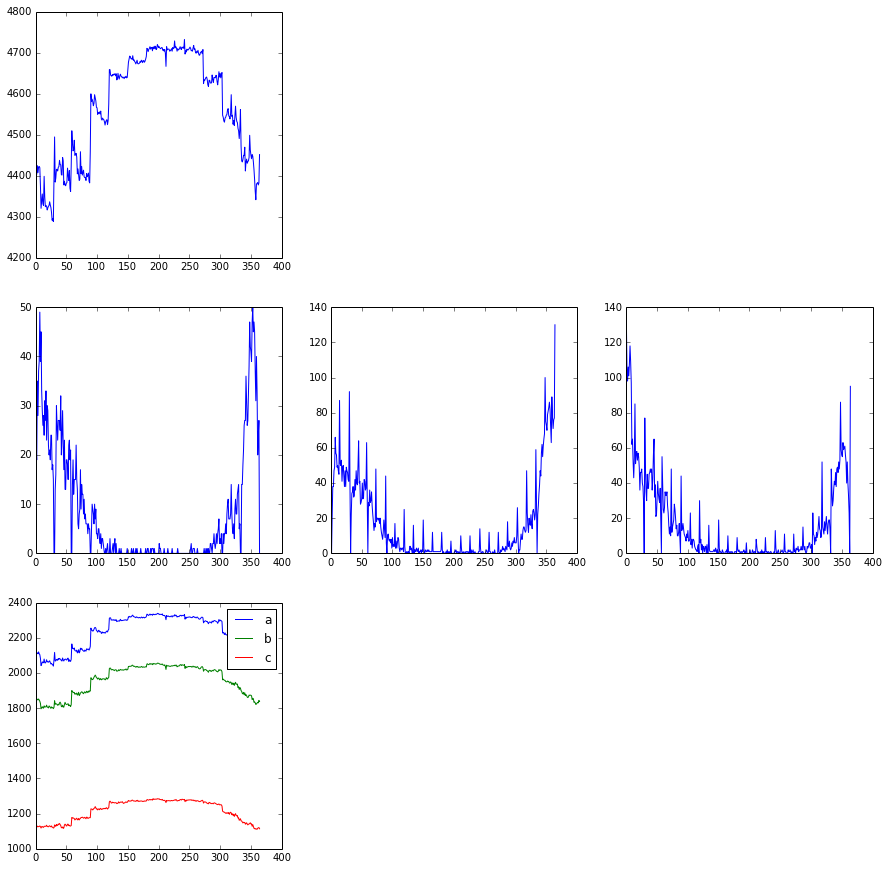

In [13]:
plt.figure(figsize=(15,15))
subplot(3,3,1)
#Complete count for SNWD
plot(((s_m_df.count())[3:368]))
subplot(3,3,4)
#Count corresponding with only beginning and end of month
plot(((tmp_df.count())[3:368]))
subplot(3,3,5)
#Count corresponding with second day of month
plot(((tmp1_df.count())[3:368]))
subplot(3,3,6)
#Count corresponding with second last day of month
plot(((tmp2_df.count())[3:368]))
subplot(3,3,7)
#Sequence removal of data associated with only beginning and end of month, second day of month and second last day of month
plot(((s_m_df.loc[~s_m_df.station.isin(tmp_df['station'])].count())[3:368]))
a = s_m_df.loc[~s_m_df.station.isin(tmp_df['station'])]
plot(((a.loc[~a.station.isin(tmp1_df['station'])].count())[3:368]))
b = a.loc[~a.station.isin(tmp1_df['station'])]
plot(((b.loc[~b.station.isin(tmp2_df['station'])].count())[3:368]))
c = b.loc[~b.station.isin(tmp2_df['station'])]
legend(['a','b','c'])